Parse the profiler output to compare output rows and op times for GPU expand operations.

In [28]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import HuberRegressor

profile_dirs = ["/opt/data/profiles/dataproc-gpu-sf100",
                "/opt/data/profiles/dataproc-gpu-sf3k",
                "/opt/data/profiles/dataproc-gpu-sf5k",
                "/opt/data/profiles/dataproc-gpu-sf10k"]

In [29]:
output_rows = []
op_times = []
for profile_dir in profile_dirs:
    apps = os.listdir(profile_dir)
    apps.sort()
    for app in apps:
        print(f"Processing gpu profile {app}")
        sql_info = pd.read_csv(f"{profile_dir}/{app}/sql_plan_metrics_for_application.csv")
        condition = (sql_info['nodeName'] == 'GpuExpand')
        filtered = sql_info[condition]
        grouped = filtered.groupby("nodeID")
        for _, group in grouped:
            for row in group.itertuples():
                if row.name == "output rows":
                    output_rows.append(row.total)
                elif row.name == "op time":
                    op_times.append(row.total / 1000000.)
print(output_rows)
print(op_times)

Processing gpu profile application_1702268529525_0404
Processing gpu profile application_1702268529525_0405
Processing gpu profile application_1702268529525_0406
Processing gpu profile application_1702268529525_0407
Processing gpu profile application_1702268529525_0408
Processing gpu profile application_1702268529525_0409
Processing gpu profile application_1702268529525_0410
Processing gpu profile application_1702268529525_0411
Processing gpu profile application_1702268529525_0412
Processing gpu profile application_1702268529525_0413
Processing gpu profile application_1702268529525_0414
Processing gpu profile application_1702268529525_0415
Processing gpu profile application_1702268529525_0416
Processing gpu profile application_1702268529525_0417
Processing gpu profile application_1702268529525_0418
Processing gpu profile application_1702268529525_0419
Processing gpu profile application_1702268529525_0420
Processing gpu profile application_1702268529525_0421
Processing gpu profile appli

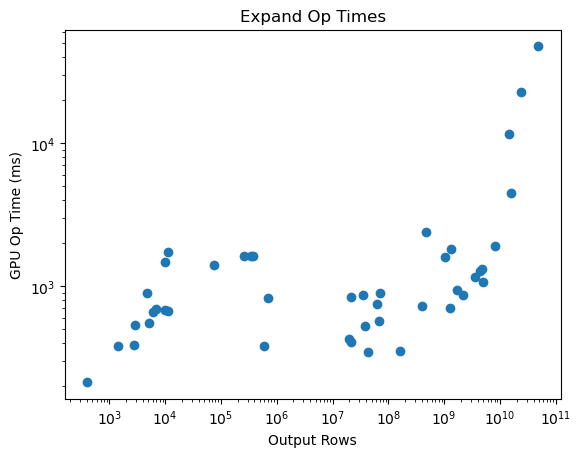

In [31]:
# Create a scatter plot
plt.scatter(output_rows, op_times)
plt.xscale('log')
plt.yscale('log')

# Calculate the linear regression line
# slope, intercept = np.polyfit(cpu_times, gpu_times, 1)
# X = np.array(cpu_times).reshape(-1, 1)
# y = np.array(gpu_times)
# regressor = HuberRegressor()
# regressor.fit(X, y)
# slope = regressor.coef_[0]
# intercept = regressor.intercept_
# print(slope, intercept)
# regression_line = np.array(cpu_times) * slope + intercept

# Plot the linear regression line
# plt.plot(cpu_times, regression_line, color='red')  # you can choose any color you like for the line

# Adding title and labels (optional)
plt.title("Expand Op Times")
plt.xlabel("Output Rows")
plt.ylabel("GPU Op Time (ms)")

# Show the plot
plt.show()